# Expirementation of training of a After State Player  other type of players

## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [2]:
%matplotlib inline
import random as rd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer
from tic_tac_toe.ASPlayer import ASPlayer


from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle

### 1.2. Creation of the function eval_player

This function will allow us to do a certain number of battles between two players (each battle has a certain number of games, 100 defaultly ), and for each battle the function output in percenetage the ratio of victory of each player and the ratio of draw according to the number of games. And output everything as a plot.

In [3]:
def eva(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win)
        p2_wins.append(p2win)
        draws.append(draw)
        count.append(i)
        p1_wins.append(p1win)
        p2_wins.append(p2win)
        draws.append(draw)
        count.append((i+1))
    

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Battles')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

## 2. We comparing two kind of ASPlayer: 

### 2.1. AS Player e-greedy with epsilon decaying over time and the step parameter size (alpha) converge to zero over time

Let check a simple result as when is playing against the TQ Player. The as player is using a step size = $\dfrac{1}{n}$ with n the nth game played. And $\epsilon = 0.1$

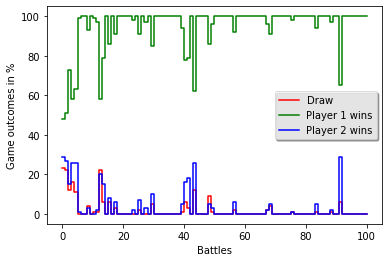

In [3]:
AsPlayer = ASPlayer()
TqPlayer = TQPlayer()
eva(TqPlayer, AsPlayer,100)

The AS Player wasn't able to play optimally. Also Curiously even the TQ Player wasn't able to play optimally.

### 2.2. AS Player just greedy with a fixed step parameter size alpha

Here the ASPlayer is not playing $\epsilon -$greedy and the step parameter size isn't decaying over time. Here we used $\alpha = 0.1$, after some experiments it has been shown that this value is giving the better optimallity

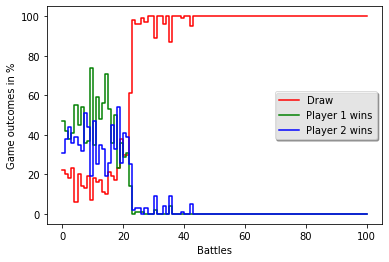

In [4]:
TqPlayer = TQPlayer()
AsPlayer = ASPlayer()
eva(TqPlayer, AsPlayer,100)

In [9]:
AsPlayer = ASPlayer()


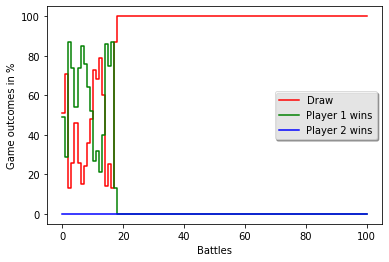

In [10]:
eva(TqPlayer1, AsPlayer,100)

So now the AS Player is learning fastly to play optimally against the TQ player then The TQ player against itself. See the next plot

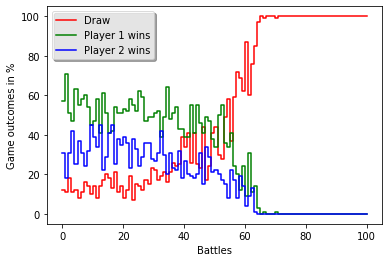

In [8]:
TqPlayer1 = TQPlayer()
TqPlayer2 = TQPlayer()
eva(TqPlayer1, TqPlayer2,100)

### 2.3. Notice

We don't know why the greedy AS player is playing better then the $\epsilon -$greedy AS player. And also why this value of $0.1$ for the step parameter size (this needs to involve more study on the question).

But in the following lines we are doing experiment of the greedy AS player because this one, at least, can play optimally

## Experiment of earning of a AS Player of other players

### 3.1. Let define a new function mean_battles

This particular function takes as parameters 2 players and calculates the the average performance of each player in a serie of 10 battles where each battle has defaultly 100 games and output the plot for 10 successive series.

In [2]:
def mean_battles(p1 : Player, p2 : Player, num_battles = 10 , games_per_battle = 100, series =11, loc='best'):

    mean_p1win = []
    mean_p2win = []
    mean_draw = []
    
    std_p1 = []
    std_p2 = []
    std_d = []
    
    for k in range(series):
        
        p1_wins = []
        p2_wins = []
        draws = []
        count = []    

        for i in range(num_battles):
            p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
            p1_wins.append(p1win)
            p2_wins.append(p2win)
            draws.append(draw)
            #count.append(i)
            
        mean_p1win.append(np.mean(p1_wins))
        mean_p2win.append(np.mean(p2_wins))
        mean_draw.append(np.mean(draws))
        
        std_p1.append(np.std(p1_wins))
        std_p2.append(np.std(p2_wins))
        std_d.append(np.std(draws))


    x = np.arange(11)    
    plt.ylabel('Battles outcomes in %')
    plt.xlabel('Series')

    plt.errorbar(x, mean_draw, yerr=std_d, label='Draw')
    plt.errorbar(x,mean_p1win, yerr=std_p1, label='Player 1 wins')
    plt.errorbar(x,mean_p2win, yerr=std_p2, label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

### 3.1. Training with the TQ Player

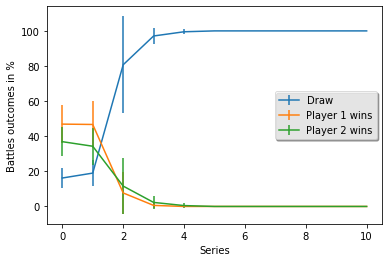

In [5]:
AsPlayer = ASPlayer()
TqPlayer = TQPlayer()
mean_battles(TqPlayer, AsPlayer)

This resukt is similar to the one we have seen above with the simple greedy AS Player

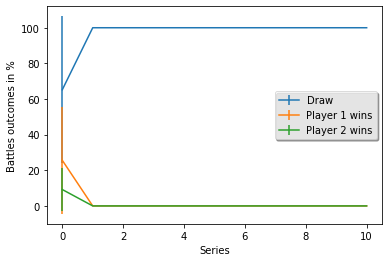

In [6]:
AsPlayer = ASPlayer()
TqPlayer = TQPlayer()
mean_battles(AsPlayer,TqPlayer)

### 3.2. With the Random Player

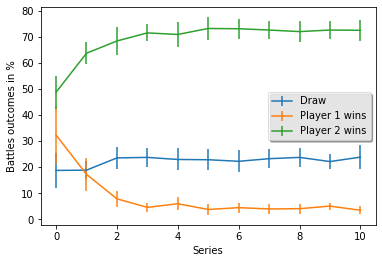

In [6]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer()
mean_battles(Rdlayer, AsPlayer)

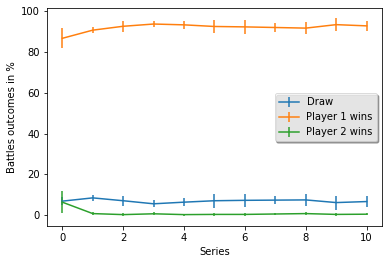

In [7]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer()
mean_battles(AsPlayer, Rdlayer)

Almost the same situation  as the Training of the TQ Player aginst the random Player

### 3.3. With the MinMax

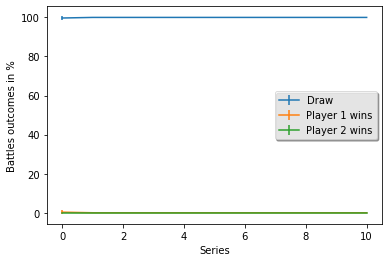

In [9]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
mean_battles(MinMaxplayer, AsPlayer)

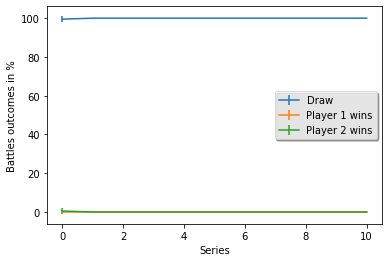

In [10]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
mean_battles(AsPlayer, MinMaxplayer)

In each case, since the first series and in the first battle the AS player was already playing optimally agains the MiniMax Player

Just a check to compare with the TQ Player against the MiniMax Player

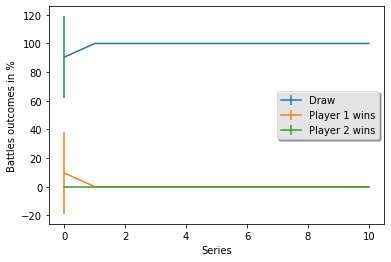

In [3]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQPlayer()
mean_battles(MinMaxplayer, TqPlayer)

So the AS Player was faster than the TQ Player to find an optimal policy to play against the Minimax Player.

### 3.4. With the random MiniMax Player

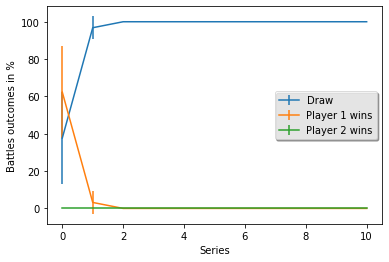

In [11]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = ASPlayer()
mean_battles(RdMinMaxplayer, AsPlayer)

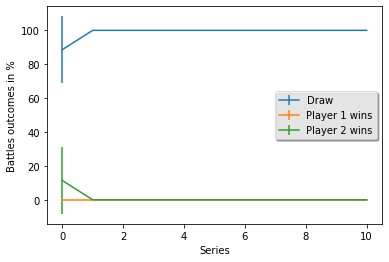

In [12]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = ASPlayer()
mean_battles(AsPlayer, RdMinMaxplayer)

Comparaison with TQ Player training with Random MinMax player

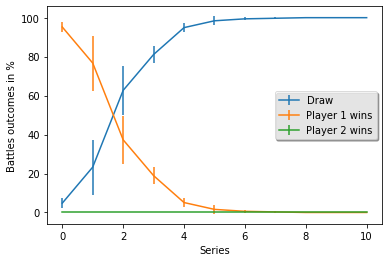

In [4]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQPlayer()
mean_battles(RdMinMaxplayer, TqPlayer)

So the AS Player was faster than the TQ Player to find an optimal policy to play against the Random Minimax Player.

## 4. Conclusion

The AS Player we implement has shown that it is faster than the TQ Player when it comes to training with other kind of players.

However it has shown that it is not a good trainer for itself if it comes to be evaluated with other players. With itself it's reaching optimallity verry fast but it stay still beatable by other players.